In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [69]:
data_table = pd.read_csv('feature_tabular.csv')

In [70]:
print(data_table.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   R_avg      1000 non-null   float64
 1   G_avg      1000 non-null   float64
 2   B_avg      1000 non-null   float64
 3   Color_var  1000 non-null   float64
 4   V_var      1000 non-null   float64
 5   S_var      1000 non-null   float64
 6   label      1000 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 54.8 KB
None


In [29]:
data_table.head(3)

,R_avg,G_avg,B_avg,Color_var,V_var,S_var,label
0,44.147092,24.922351,23.111279,12307.55501,22635.94961,0.283509,0
1,42.042765,14.144777,11.831613,14382.45367,27451.21879,0.305891,0
2,37.144078,32.625537,31.838437,10079.70282,23664.85404,0.208596,0


In [42]:
data_table.describe()

,R_avg,G_avg,B_avg,Color_var,V_var,S_var,label
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.604443,0.598700,0.563913,0.478731,0.504161,0.246236,1.500000
std,0.220515,0.198727,0.209831,0.190819,0.136330,0.202329,1.118593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.457984,0.478659,0.421676,0.350056,0.411983,0.066813,0.750000
50%,0.614866,0.609531,0.579891,0.486337,0.495392,0.214576,1.500000
75%,0.782242,0.751540,0.718334,0.601012,0.596342,0.392903,2.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [33]:
cols_to_norm = ['R_avg', 'G_avg', 'B_avg','Color_var','V_var','S_var']
data_table[cols_to_norm] = data_table[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [47]:
from sklearn.preprocessing import RobustScaler
robustScaler = RobustScaler()
print(robustScaler.fit(data_table[cols_to_norm]))
data_table[cols_to_norm] = robustScaler.transform(data_table[cols_to_norm])

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)


In [48]:
data_table

,R_avg,G_avg,B_avg,Color_var,V_var,S_var,label
0,0.848391,-0.419380,-0.425613,-0.052461,0.121038,0.999489,0
1,0.710339,-1.256741,-1.235407,0.289515,0.915495,1.130343,0
2,0.388965,0.179118,0.200931,-0.419647,0.290794,0.561515,0
3,0.111196,0.474203,0.664038,-0.394899,0.458260,-0.305009,0
4,0.525166,0.731128,0.507792,0.336297,0.489084,0.036555,0
...,...,...,...,...,...,...,...
995,0.055603,-0.433669,-0.705726,0.179956,0.981409,0.614663,3
996,0.748943,0.752472,0.693920,0.215602,-0.040268,0.275119,3
997,0.551032,0.410014,0.314894,0.153200,-0.213628,0.513920,3
998,-0.088228,-0.880445,-1.592548,0.643644,0.477375,1.444608,3


In [49]:
X_features = data_table.iloc[:,:-1]
y_labels = data_table.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.4, random_state=111)

In [50]:
X_train.head(3)

,R_avg,G_avg,B_avg,Color_var,V_var,S_var
0,0.848391,-0.419380,-0.425613,-0.052461,0.121038,0.999489
221,0.815835,0.607851,0.546076,0.041817,0.200427,0.050190
340,-0.376091,0.170296,0.565012,-1.167495,1.085545,0.528117


In [51]:
y_train.head(5)

0      0
221    0
340    1
691    2
255    1
Name: label, dtype: int64

In [52]:
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)

print('\n테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(600, 6), 테스트 세트 Shape:(400, 6)
학습 세트 레이블 값 분포 비율
1    0.260000
0    0.253333
2    0.250000
3    0.236667
Name: label, dtype: float64

테스트 세트 레이블 값 분포 비율
3    0.270
2    0.250
0    0.245
1    0.235
Name: label, dtype: float64


In [53]:
from pycaret.classification import *
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

In [76]:
from pycaret.classification import *
clf1 = setup(data_table, target = 'label', train_size = 0.7,
            transformation= True,  remove_outliers = True)

,Description,Value
0,session_id,3173
1,Target,label
2,Target Type,Multiclass
3,Label Encoded,"0: 0, 1: 1, 2: 2, 3: 3"
4,Original Data,"(1000, 7)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [77]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6700,0.8701,0.6719,0.6801,0.6659,0.5603,0.5650,0.0140
lda,Linear Discriminant Analysis,0.6685,0.8696,0.6710,0.6915,0.6635,0.5587,0.5667,0.0060
qda,Quadratic Discriminant Analysis,0.6626,0.8694,0.6658,0.6793,0.6537,0.5509,0.5590,0.0060
ridge,Ridge Classifier,0.6625,0.0000,0.6658,0.6907,0.6585,0.5510,0.5609,0.0060
rf,Random Forest Classifier,0.6580,0.8602,0.6585,0.6661,0.6554,0.5438,0.5471,0.1080
et,Extra Trees Classifier,0.6578,0.8628,0.6585,0.6663,0.6537,0.5437,0.5480,0.1000
gbc,Gradient Boosting Classifier,0.6385,0.8609,0.6381,0.6461,0.6335,0.5175,0.5220,0.0940
lightgbm,Light Gradient Boosting Machine,0.6294,0.8559,0.6300,0.6339,0.6262,0.5057,0.5084,0.0390
svm,SVM - Linear Kernel,0.6234,0.0000,0.6254,0.6353,0.6182,0.4982,0.5039,0.0180
knn,K Neighbors Classifier,0.5993,0.8170,0.5999,0.6103,0.5968,0.4655,0.4696,0.0270


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3173, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7463,0.9075,0.7434,0.7564,0.7403,0.6610,0.6674
1,0.7164,0.8890,0.7182,0.7311,0.7157,0.6224,0.6265
2,0.6716,0.8404,0.6728,0.6733,0.6629,0.5620,0.5672
3,0.6716,0.8806,0.6737,0.6683,0.6615,0.5622,0.5668
4,0.6667,0.8594,0.6725,0.6731,0.6631,0.5565,0.5603
5,0.6364,0.8700,0.6431,0.6350,0.6308,0.5162,0.5189
6,0.5909,0.8373,0.5912,0.6178,0.5851,0.4547,0.4637
7,0.6667,0.8638,0.6673,0.6929,0.6691,0.5558,0.5601
8,0.6212,0.8675,0.6233,0.6362,0.6211,0.4960,0.4999
9,0.7121,0.8857,0.7135,0.7171,0.7096,0.6163,0.6195


In [97]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7015,0.8843,0.6982,0.7125,0.6988,0.6011,0.6051
1,0.7612,0.8879,0.7607,0.7615,0.7570,0.6816,0.6843
2,0.6716,0.8652,0.6746,0.6652,0.6656,0.5624,0.5639
3,0.6119,0.8555,0.6121,0.6303,0.6148,0.4819,0.4849
4,0.6212,0.8207,0.6284,0.6217,0.6173,0.4957,0.4977
5,0.6364,0.8629,0.6412,0.6397,0.6334,0.5162,0.5189
6,0.6667,0.8535,0.6647,0.6940,0.6604,0.5551,0.5651
7,0.5606,0.8307,0.5597,0.5715,0.5609,0.4145,0.4167
8,0.6364,0.8686,0.6319,0.6525,0.6358,0.5138,0.5181
9,0.7121,0.8731,0.7135,0.7117,0.7102,0.6156,0.6165


In [98]:
tuned_rf = tune_model(rf, n_iter = 500, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6866,0.8872,0.6835,0.7099,0.6753,0.5809,0.5903
1,0.7463,0.8857,0.7451,0.7535,0.7394,0.6612,0.6670
2,0.7015,0.8663,0.7031,0.6979,0.6975,0.6021,0.6034
3,0.6418,0.8765,0.6425,0.6504,0.6394,0.5219,0.5258
4,0.6667,0.8315,0.6745,0.6746,0.6590,0.5573,0.5649
5,0.5758,0.8609,0.5824,0.5742,0.5688,0.4359,0.4393
6,0.5758,0.8390,0.5765,0.5680,0.5546,0.4338,0.4441
7,0.6061,0.8292,0.6048,0.5969,0.5933,0.4747,0.4796
8,0.6818,0.8699,0.6788,0.6945,0.6838,0.5751,0.5771
9,0.7576,0.8712,0.7604,0.7639,0.7572,0.6767,0.6790


In [99]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5970,0.8928,0.5924,0.6044,0.5912,0.4610,0.4660
1,0.7164,0.8924,0.7183,0.7299,0.7088,0.6224,0.6293
2,0.7015,0.8622,0.7022,0.7012,0.7004,0.6020,0.6026
3,0.5970,0.8705,0.5947,0.6245,0.5946,0.4614,0.4685
4,0.6212,0.8263,0.6245,0.6327,0.6203,0.4954,0.4983
5,0.5758,0.8567,0.5804,0.5825,0.5733,0.4349,0.4373
6,0.6061,0.8310,0.6039,0.6068,0.5908,0.4739,0.4831
7,0.6212,0.8336,0.6204,0.6199,0.6178,0.4948,0.4963
8,0.6667,0.8652,0.6632,0.6716,0.6596,0.5549,0.5606
9,0.6818,0.8787,0.6806,0.6874,0.6781,0.5746,0.5778


In [100]:
tuned_gbc = tune_model(gbc, n_iter = 500, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6567,0.8969,0.6522,0.6653,0.6543,0.5404,0.5442
1,0.7313,0.9039,0.7312,0.7324,0.7259,0.6418,0.6455
2,0.7313,0.8720,0.7325,0.7310,0.7282,0.6419,0.6436
3,0.6119,0.8764,0.6121,0.6275,0.6145,0.4819,0.4840
4,0.6667,0.8452,0.6725,0.6791,0.6649,0.5562,0.5598
5,0.6212,0.8785,0.6245,0.6326,0.6205,0.4954,0.4982
6,0.6364,0.8525,0.6412,0.6179,0.6173,0.5156,0.5210
7,0.6061,0.8378,0.6057,0.6125,0.6054,0.4751,0.4770
8,0.6667,0.8805,0.6632,0.6719,0.6668,0.5549,0.5561
9,0.7424,0.8835,0.7431,0.7434,0.7411,0.6560,0.6570


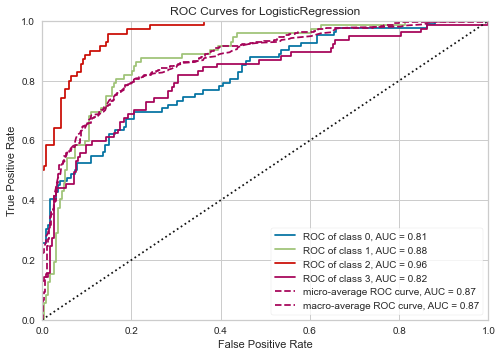

In [82]:
plot_model(estimator = tuned_lr, plot = 'auc')

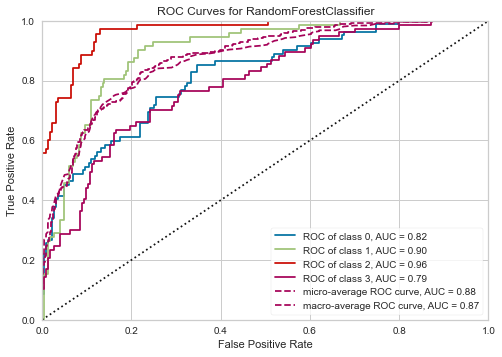

In [102]:
plot_model(estimator = tuned_rf, plot = 'auc')

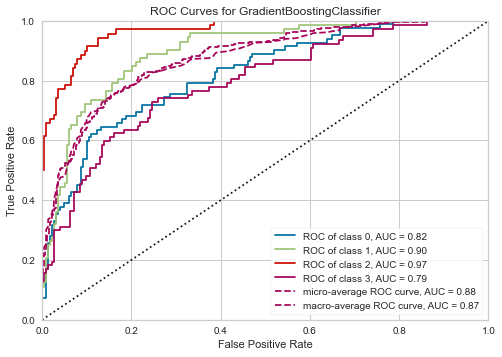

In [103]:
plot_model(estimator = tuned_gbc, plot = 'auc')

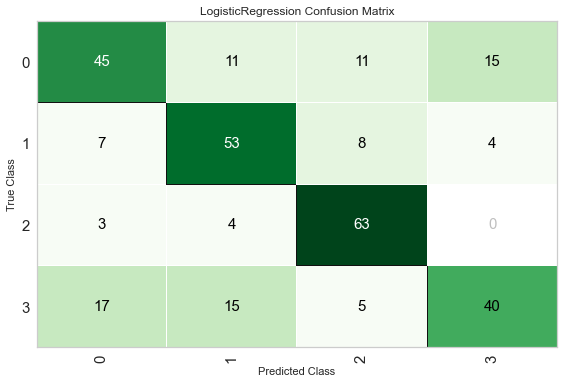

In [85]:
plot_model(estimator = tuned_lr, plot = 'confusion_matrix')

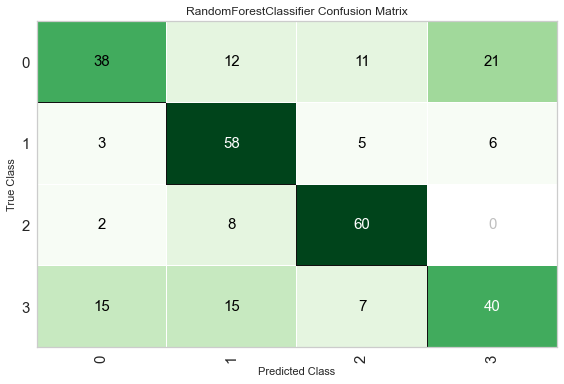

In [105]:
plot_model(estimator = tuned_rf, plot = 'confusion_matrix')

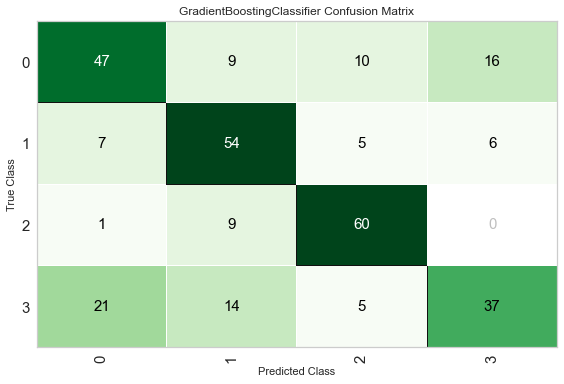

In [104]:
plot_model(estimator = tuned_gbc, plot = 'confusion_matrix')

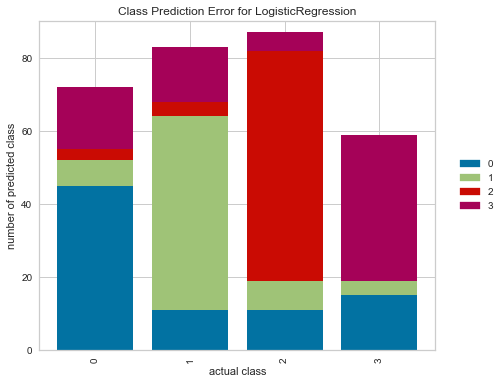

In [86]:
plot_model(estimator = tuned_lr, plot = 'error')

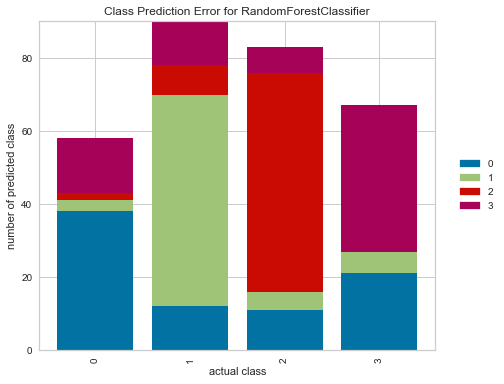

In [106]:
plot_model(estimator = tuned_rf, plot = 'error')

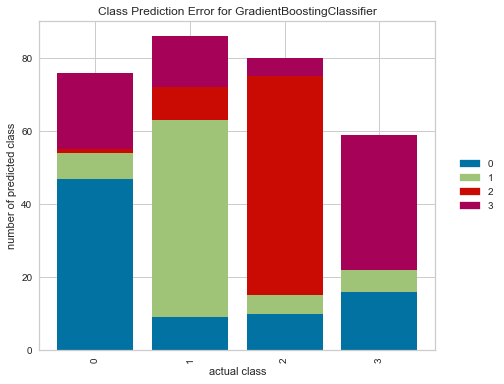

In [107]:
plot_model(estimator = tuned_gbc, plot = 'error')

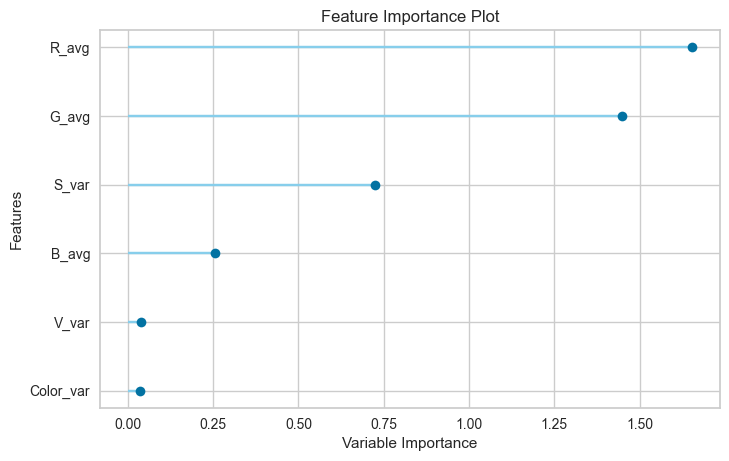

In [95]:
plot_model(estimator = tuned_lr, plot = 'feature')

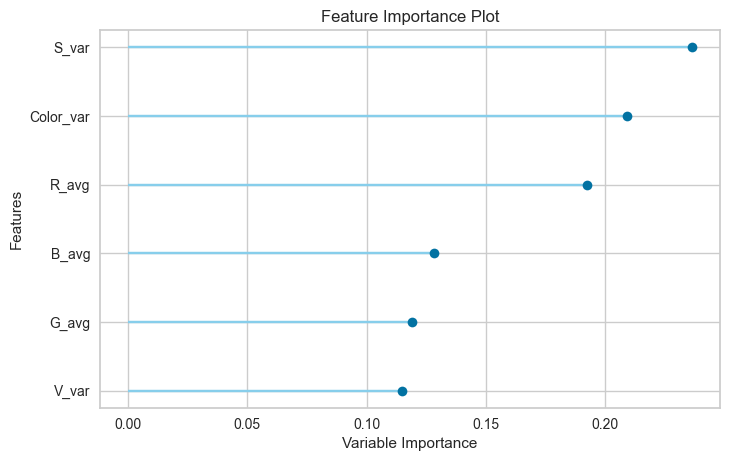

In [108]:
plot_model(estimator = tuned_rf, plot = 'feature')

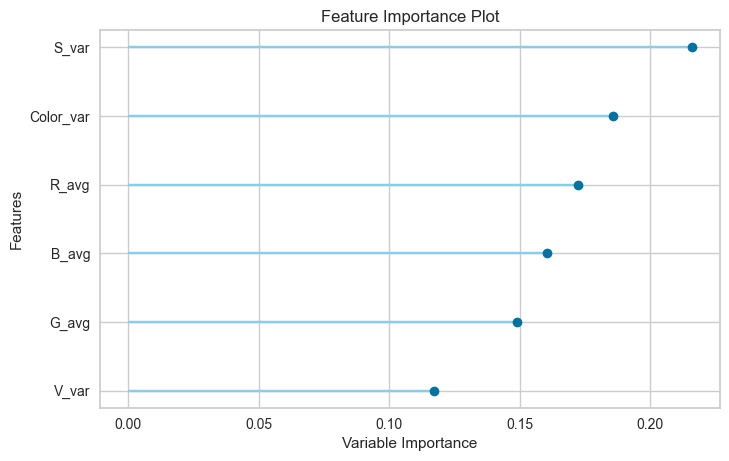

In [109]:
plot_model(estimator = tuned_gbc, plot = 'feature')

In [96]:
plot_model(estimator = tuned_lr, plot = 'parameter')

,Parameters
C,7.174
class_weight,{}
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,1000
multi_class,auto
n_jobs,None
penalty,l2


In [110]:
plot_model(estimator = tuned_rf, plot = 'parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
class_weight,balanced_subsample
criterion,entropy
max_depth,10
max_features,log2
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.001
min_impurity_split,None


In [111]:
plot_model(estimator = tuned_gbc, plot = 'parameter')

,Parameters
ccp_alpha,0.0
criterion,friedman_mse
init,None
learning_rate,0.01
loss,deviance
max_depth,8
max_features,1.0
max_leaf_nodes,None
min_impurity_decrease,0.002
min_impurity_split,None
